In [1]:
from HDF.HDFData import HDFArray
import matplotlib.pyplot as plt
import peakdetect as pkd
import os.path
import math
from Analyzer import *
path = './FilteredData/'
count_files = 85

In [2]:
#Найдем минимальную длину интервала, которая подойдет для точного прогнозирования данных
file = FileAnalyzer(path + '0.h5')
length_min_interval = file.get_min_length_intervals()
length_min_intervals_from_files = []
max_lenght_interval = 0
for i in range(1, count_files):
    filename = path + str(i) + '.h5'
    file = FileAnalyzer(filename)
    min_length = file.get_min_length_intervals()
    length_min_intervals_from_files.append(min_length)
    print('file = ', filename, ' with min length interval = ', min_length)
    if file.get_min_length_intervals() < length_min_interval:
        length_min_interval = file.get_min_length_intervals()

print('Min length interval = ', length_min_interval)

file =  ./FilteredData/1.h5  with min length interval =  80
file =  ./FilteredData/2.h5  with min length interval =  47
file =  ./FilteredData/3.h5  with min length interval =  37
file =  ./FilteredData/4.h5  with min length interval =  90
file =  ./FilteredData/5.h5  with min length interval =  68
file =  ./FilteredData/6.h5  with min length interval =  58
file =  ./FilteredData/7.h5  with min length interval =  62
file =  ./FilteredData/8.h5  with min length interval =  65
file =  ./FilteredData/9.h5  with min length interval =  148
file =  ./FilteredData/10.h5  with min length interval =  131
file =  ./FilteredData/11.h5  with min length interval =  49
file =  ./FilteredData/12.h5  with min length interval =  35
file =  ./FilteredData/13.h5  with min length interval =  64
file =  ./FilteredData/14.h5  with min length interval =  54
file =  ./FilteredData/15.h5  with min length interval =  42
file =  ./FilteredData/16.h5  with min length interval =  48
file =  ./FilteredData/17.h5  w

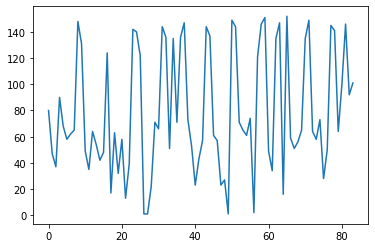

In [3]:
plt.plot(length_min_intervals_from_files)
#График минимальных длин интервалов из полученных файлов

In [4]:
average_series = sum(length_min_intervals_from_files)/count_files
print('Среднее полученного ряда: ', average_series)

Среднее полученного ряда:  77.67058823529412


In [5]:
count = 0
for i in range(count_files):
    filename = path + str(i) + '.h5'
    file = FileAnalyzer(filename)
    min_length = file.get_min_length_intervals()
    if min_length > average_series:
        count+=1
print('count files = ', count)
#Получили 33 файла из 85, что не очень положительно влияет на обучающую выборку
#Попробуем взять медиану ряда

ERROR len track =  1  len interval =  10000000000.0
ERROR len track =  1  len interval =  10000000000.0
ERROR len track =  1  len interval =  10000000000.0
count files =  32


In [6]:
median_of_series = sorted(length_min_intervals_from_files)[42] # Взяли медиану ряда
print('Медиана полученного ряда: ', median_of_series)

Медиана полученного ряда:  65


In [7]:
count = 0
good_files = []
for i in range(count_files):
    filename = path + str(i) + '.h5'
    file = FileAnalyzer(filename)
    min_length = file.get_min_length_intervals()
    if min_length > median_of_series and file.is_good_file():
        good_files.append(str(i)+'.h5')
print('Count good files = ', len(good_files))
#Здесь уже видим, что нам подходят 35 файла с минимальной длинной интервала 66.
#Также три файла говорят о некорректности данных, хранящихся в них.

ERROR len track =  1  len interval =  10000000000.0
ERROR len track =  1  len interval =  10000000000.0
ERROR len track =  1  len interval =  10000000000.0
Count good files =  35


In [8]:
print(good_files)

['1.h5', '5.h5', '9.h5', '10.h5', '17.h5', '24.h5', '25.h5', '30.h5', '31.h5', '32.h5', '33.h5', '35.h5', '36.h5', '37.h5', '38.h5', '39.h5', '44.h5', '45.h5', '51.h5', '52.h5', '53.h5', '56.h5', '58.h5', '59.h5', '60.h5', '63.h5', '64.h5', '66.h5', '71.h5', '72.h5', '75.h5', '78.h5', '79.h5', '81.h5', '84.h5']


In [17]:
count_all_intervals = 0
max_intervals = 0
name_file = ""
for filename in good_files:
    file = FileAnalyzer(path + filename)
    count = len(file.get_intervals())
    if count > max_intervals:
        max_intervals = count
        name_file = filename
    count_all_intervals += count
print('Всего интервалов во всех подходящих файлах: ', count_all_intervals)
print('Файл с наибольшим числом интервалов: ', name_file)

Всего интервалов во всех подходящих файлах:  4018
Файл с наибольшим числом интервалов:  39.h5


In [18]:
print(max_intervals)

284


In [10]:
count_files_for_train = int(len(good_files) * 0.9)
count_files_for_test = len(good_files) - count_files_for_train
print('Файлов для обучения: ', count_files_for_train)
print('Файлов для проверки: ', count_files_for_test)

Файлов для обучения:  31
Файлов для проверки:  4


In [11]:
intervals_good = []
count = 30
flag = True
for i in range(len(good_files)):
    if (flag == False):
        break
    filename = good_files[i]
    file = FileAnalyzer(path + filename)
    if (file.is_good_file()):
        intervals = file.get_intervals()
        print('good file is ', filename)
        for interval in intervals:
            if (interval.is_good()):
                interval.trim(0, 66)
                print(count, 'interval = ', interval.get_length())
                intervals_good.append(interval.eeg)
                count -=1
                if count == 0:
                    flag = False

good file is  1.h5
30 interval =  66
29 interval =  66
28 interval =  66
27 interval =  66
26 interval =  66
25 interval =  66
24 interval =  66
23 interval =  66
22 interval =  66
21 interval =  66
20 interval =  66
19 interval =  66
18 interval =  66
17 interval =  66
16 interval =  66
15 interval =  66
14 interval =  66
13 interval =  66
12 interval =  66
11 interval =  66
10 interval =  66
9 interval =  66
8 interval =  66
7 interval =  66
6 interval =  66
5 interval =  66
4 interval =  66
3 interval =  66
2 interval =  66
1 interval =  66
0 interval =  66
-1 interval =  66
-2 interval =  66
-3 interval =  66
-4 interval =  66
-5 interval =  66
-6 interval =  66
-7 interval =  66
-8 interval =  66
-9 interval =  66
-10 interval =  66
-11 interval =  66
-12 interval =  66
-13 interval =  66
-14 interval =  66
-15 interval =  66
-16 interval =  66
-17 interval =  66
-18 interval =  66
-19 interval =  66
-20 interval =  66
-21 interval =  66
-22 interval =  66
-23 interval =  66
-24 i

In [41]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
X = [1,2,3]
Y = [0.5, 1.4, 2.7]
Z = [0.4, 0.8, 1]
Axes3D.plot(X, Y)

TypeError: plot() missing 1 required positional argument: 'ys'

In [15]:
# Сделаем датасет train
import csv
import struct
path_to_train = ".\\dataset\\train\\"
id_file = 0
y = []
for i in range(count_files_for_train):
    filename = good_files[i]
    file = FileAnalyzer(path + filename)
    intervals = file.get_intervals()
    for interval in intervals:
        charact = interval.get_characteristics()
        if (charact is None or charact[0] == 0):
            continue
        interval.trim(0, 66)
        interval.save_to_csv(path_to_train + str(id_file)+'.csv')
        y_cur = [charact[0], charact[1]]
        y.append(y_cur)
        id_file+=1

filename = path_to_train +'y.csv'
with open(filename, "w", newline='') as out_file:
    writer = csv.writer(out_file, delimiter=';')
    writer.writerows(y)

In [16]:
# Сделаем датасет test
import csv
import struct
path_to_train = ".\\dataset\\test\\"
id_file = 0
y = []
for i in range(count_files_for_train,len(good_files) ):
    filename = good_files[i]
    file = FileAnalyzer(path + filename)
    intervals = file.get_intervals()
    for interval in intervals:
        charact = interval.get_characteristics()
        if (charact is None or charact[0] == 0):
            continue
        interval.trim(0, 66)
        interval.save_to_csv(path_to_train + str(id_file)+'.csv')
        y_cur = [charact[0], charact[1]]
        y.append(y_cur)
        id_file+=1

filename = path_to_train +'y.csv'
with open(filename, "w", newline='') as out_file:
    writer = csv.writer(out_file, delimiter=';')
    writer.writerows(y)